In [2]:
import numpy as np
import pylab as plt
import pandas as pd
from copy import deepcopy
import sklearn as sk
from pathlib import Path

from pympute import *

In [3]:
# dtime = 1
# realization = '2nd'

# data = pd.read_hdf('sample_data/data_{}_{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
# masked = pd.read_hdf('sample_data/data_{}_{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(data=data['data'],columns=data['feature_names'])
print(data.shape)
data.head(5)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
n1_miss,n2_miss = 50,150
masked = deepcopy(data)
for col in data.columns:
    n_miss = np.random.randint(n1_miss,n2_miss)
    i_miss = np.random.randint(0,data[col].shape[0],n_miss)
    masked.loc[i_miss,col] = np.nan

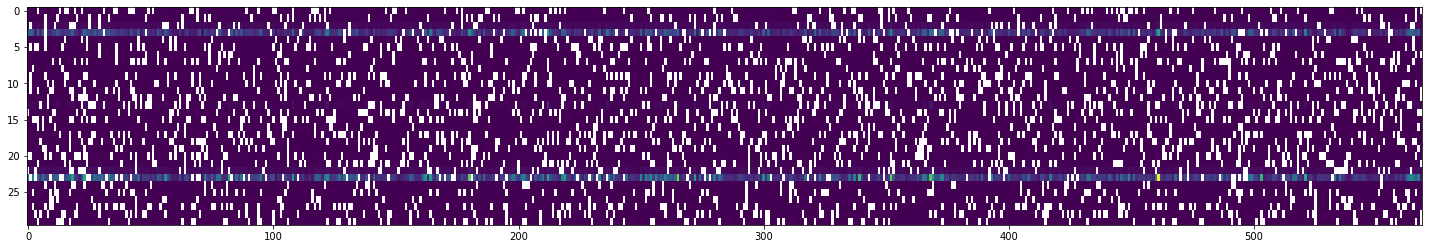

In [6]:
fig,ax = plt.subplots(figsize=(25,4))
ax.imshow(masked.T.values,interpolation='none',aspect='auto')

In [7]:
normin,normax = get_rescale(masked.values)
masked_n = set_rescale(masked,normin,normax)
data_n = set_rescale(data,normin,normax)

imp = Imputer(masked_n,'LR',loss_f=None,fill_method='random',save_history=True)
imp.impute(10,inds=None)

100%|██████████| 300/300 [00:02<00:00, 101.31it/s]


In [8]:
masked_n.to_csv('sample.csv',index=0)

In [9]:
imp.save('./')

<AxesSubplot:>

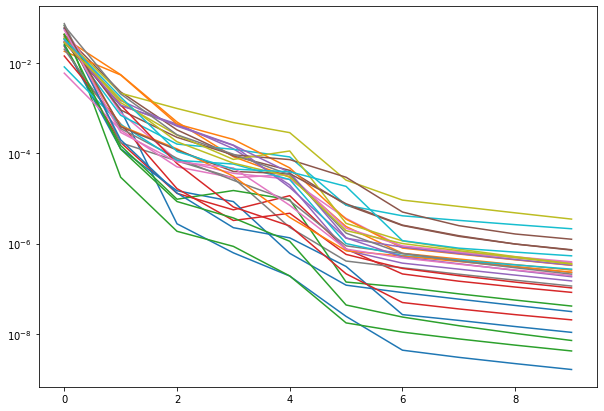

In [10]:
imp.plot_loss_frame()

No handles with labels found to put in legend.


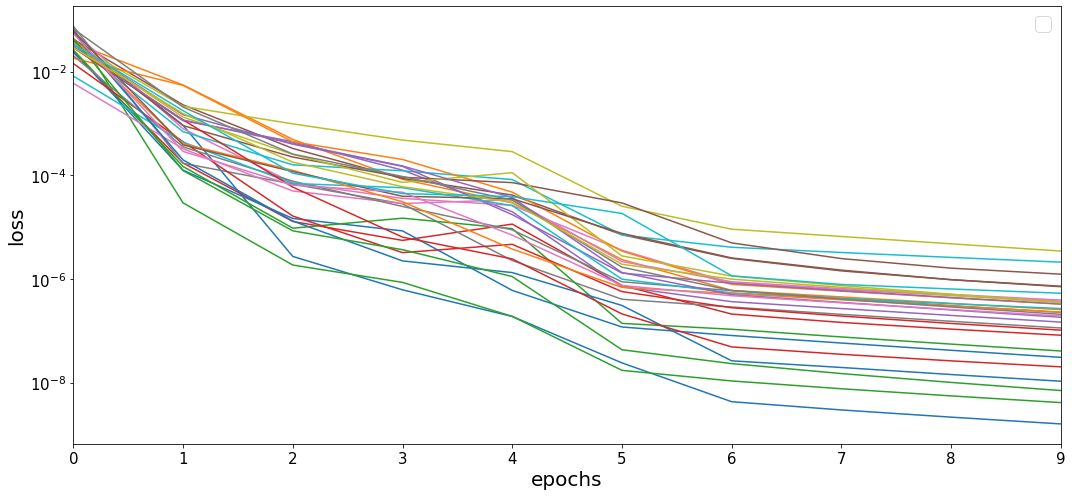

In [11]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0]-1)
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig('loss.jpg',dpi=100)

<AxesSubplot:>

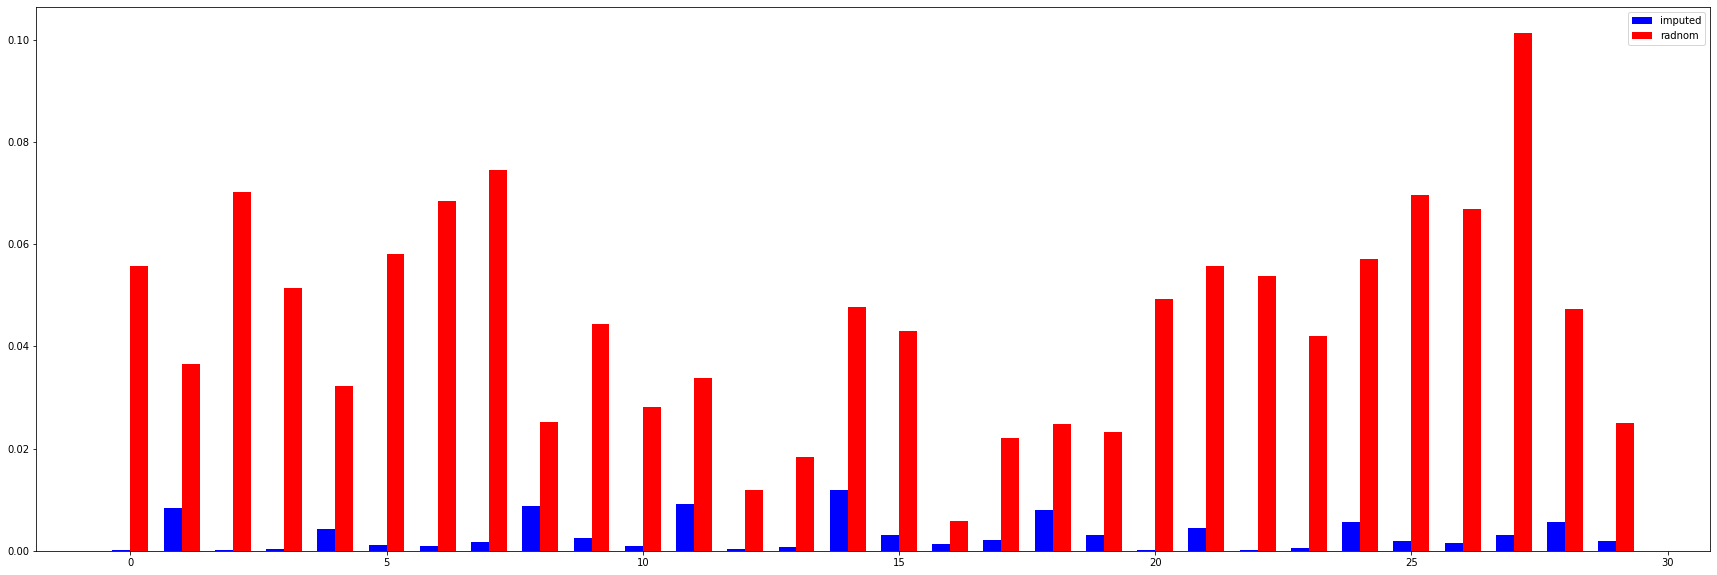

In [12]:
imp.compare(data_n,with_random=1,save='test')

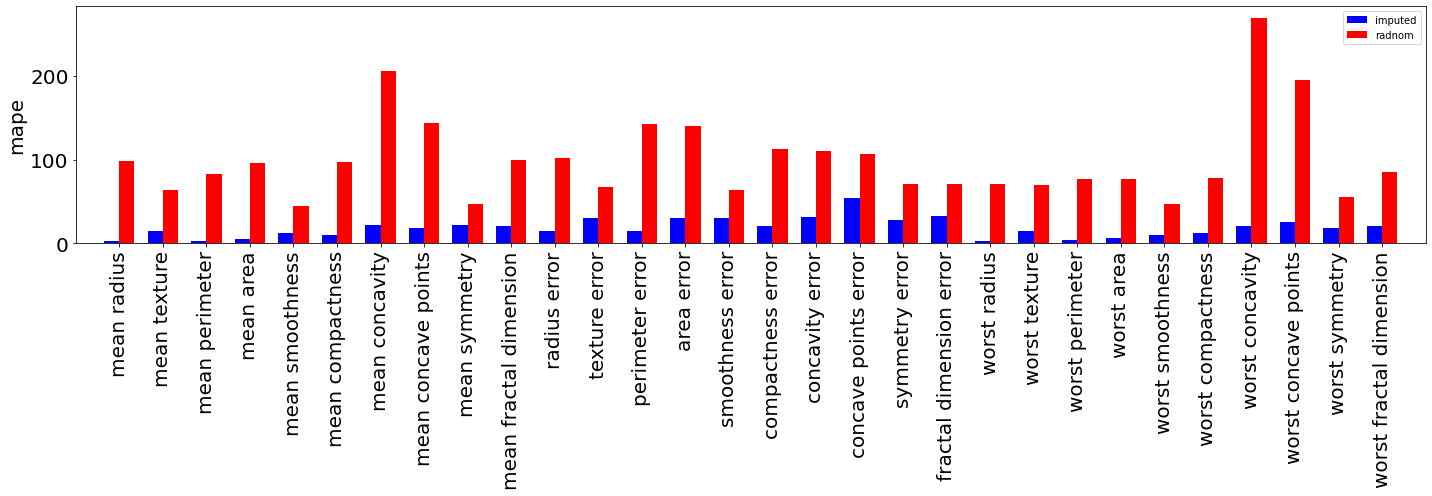

In [12]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,com_f=mape,ax=ax,with_random=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mape', fontsize=20)
ax.set_xticks(np.arange(imp.ncol))
ax.set_xticklabels(imp.cols,rotation=90)
ax.set_xlim(-1,imp.ncol)
# ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
# ax.legend(fontsize=20)
plt.tight_layout()

((0.25592463569010354, 0.17827878906824984, 0.3933074922722144),
 (0.2590604053765958, 0.18034476107998076, 0.39689685811545017))

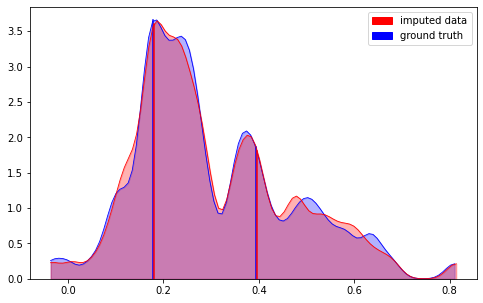

In [13]:
imp.dist('mean radius',data_n,cl=50,bandwidth=0.02)

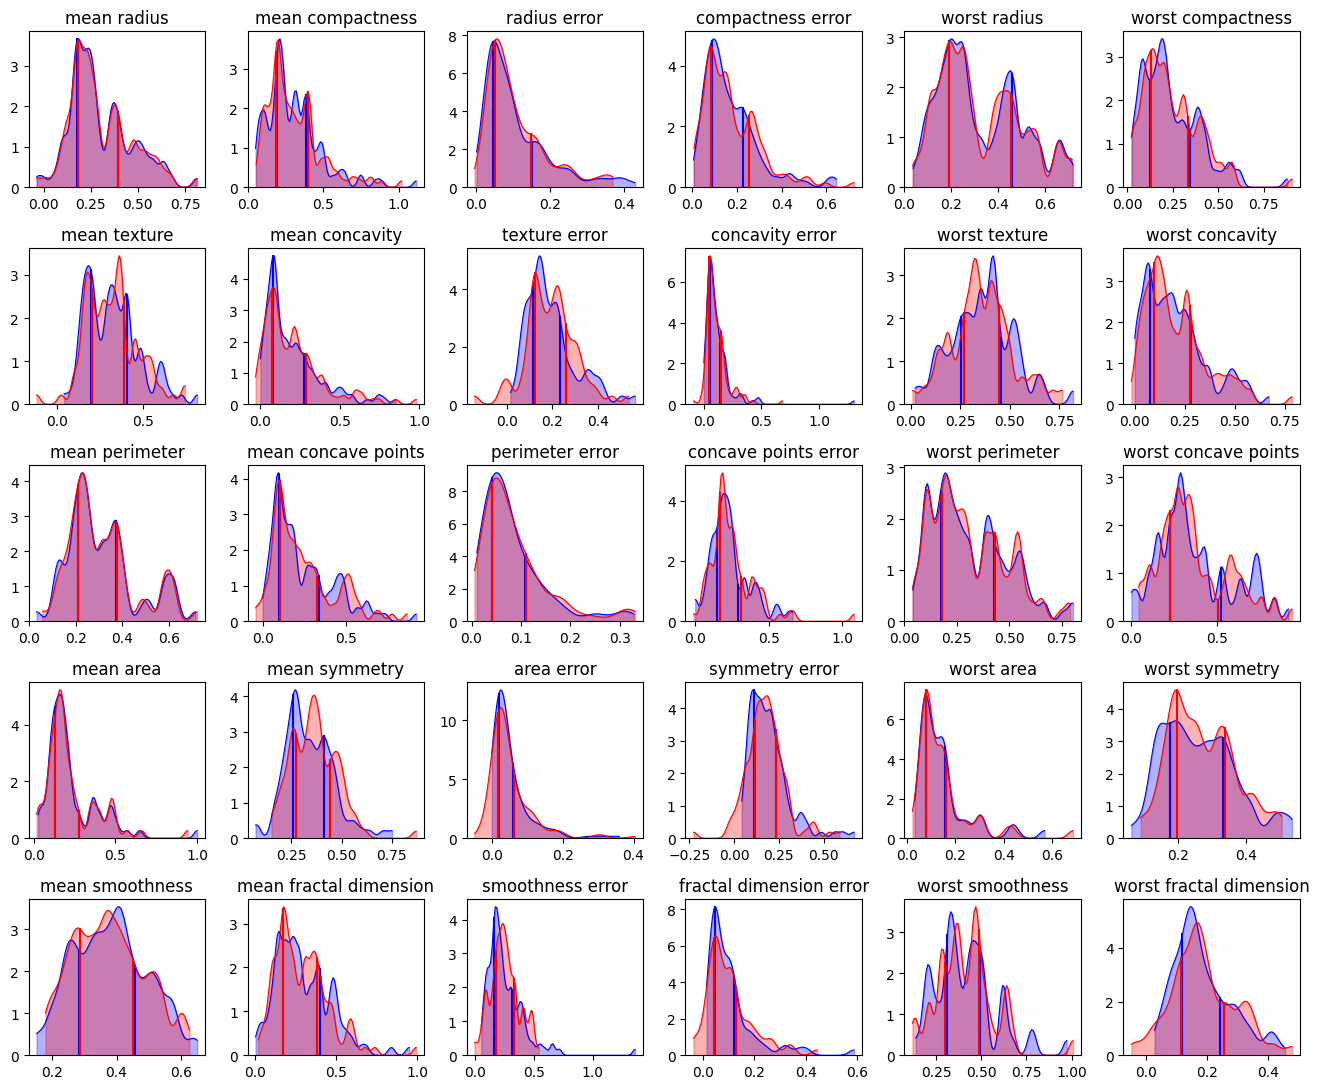

In [16]:
imp.dist_all(data_n,cl=50)

In [14]:
imp.general_report(data_n)

,rmse,mape,r2_score,ttest,mape_q1,mape_q2,mape_q3,mape_q4
0,0.026405,10.669435,0.980341,0.919881,9.570145,1.305781,1.353198,1.007954
1,0.098674,26.385454,0.760671,0.879813,61.749798,19.586045,13.980450,10.999094
2,0.015734,4.480384,0.992580,0.918376,2.689777,0.988933,0.643798,0.710526
3,0.012439,6.023825,0.991858,0.949645,9.216528,5.561098,3.986158,2.619292
4,0.069198,12.231363,0.830291,0.923543,15.462788,9.898327,9.269003,11.355372
5,0.034043,12.504932,0.950545,0.901840,22.486766,13.822505,5.919224,9.009073
6,0.029330,16.601933,0.972197,0.879228,27.330429,13.760583,11.329613,5.222219
7,0.037484,16.851909,0.958341,0.823274,22.287891,13.869126,11.825785,7.446792
8,0.082480,17.583722,0.589144,0.851048,24.558795,17.696148,14.505192,12.738238
9,0.065128,24.563540,0.848594,0.909560,44.280380,17.015847,11.441175,13.304237


In [ ]:
# imp.load(model_path)

In [3]:
if not in_notebook():
    import argparse
    parser = argparse.ArgumentParser(description='MODEL ACTIVITY ANALYZER.')
    parser.add_argument('--dataset', default='./dataset', type=str, help='path to dataset')
    parser.add_argument('--fillm', default='random', type=str, help='filling initiation')
    parser.add_argument('--mlm', default='LR', type=str, help='ML method')
    parser.add_argument('--nl', default=4, type=int, help='NN # of layers')
    parser.add_argument('--batchnorm', default=0, type=int, help='batch norm layer for NN')
    parser.add_argument('--dropout', default=0.0, type=float, help='dropout layer for NN')
    parser.add_argument('--iterate', default=0, type=int, help='# iteration')
    parser.add_argument('--dtime', default=0, type=int, help='data section time')
    parser.add_argument('--prefix', default='', type=str, help='prefix')
    
    args = parser.parse_args()
    data_path = args.dataset
    fill_method = args.fillm
    mlm = args.mlm
    nlayer = args.nl
    batchnorm = args.dropout
    dropout = args.dropout
    n_iterate = args.iterate
    dtime = args.dtime
    prefix = args.prefix

else:
    data_path = '../jiang/SimulationLabData/data/'
    fill_method='random'
    mlm = 'LR'
    nlayer = 4
    batchnorm = 1
    dropout = 0.1
    n_iterate = 10
    dtime = 1
    prefix = ''

if dtime<2:
    dtime = '_'+str(dtime)
elif dtime==2:
    dtime = ''
else:
    assert 0,'dtime is not recognized!'

realization = '2nd'


if mlm in skmodels.keys():
    prefix = prefix+'{}-{}'.format(fill_method,mlm)
    kargs = {}
    model_ = skmodels[mlm]
elif mlm=='NN':
    prefix = prefix+'{}-NN-nl{}-bt{}-do{}'.format(fill_method,nlayer,batchnorm,dropout)
    kargs = {'epochs':3,'verbose':0}

    def model_():
        return dense_model(inp=44,
                           out=1,
                           nlayer=nlayer,
                           batchnorm=batchnorm,
                           dropout=dropout,
                           loss='mean_squared_error',
                           optimizer='adam',
                           kernel_initializer='normal')
    
    model = model_()
    model.summary()
else:
    assert 0,'model not regognized!'

# Path('results2').mkdir(parents=True, exist_ok=True)
# Path('results2/'+prefix).mkdir(parents=True, exist_ok=True)

model_path = 'results/'+prefix+'/'

data = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
masked = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

normin,normax = get_rescale(masked.values)
masked_n = set_rescale(masked,normin,normax)
data_n = set_rescale(data,normin,normax)

imp = Imputer(masked_n,model_,loss_f=None,fill_method=fill_method,save_history=True)
if os.path.exists(model_path+'model.pkl'):
    imp.load(model_path)

imp.impute(n_iterate,inds=None,**kargs)
imp.save(model_path)


No handles with labels found to put in legend.


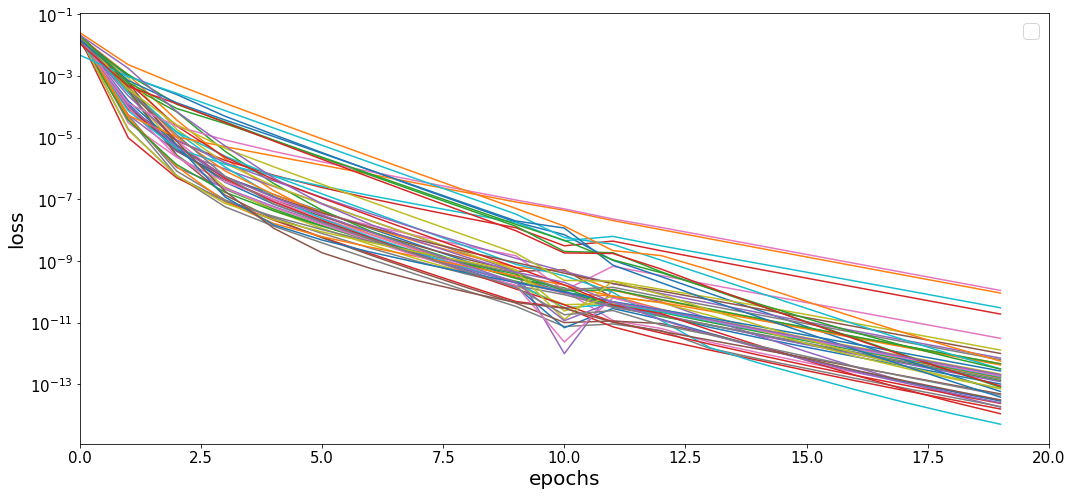

In [18]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0])
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'loss.jpg',dpi=100)

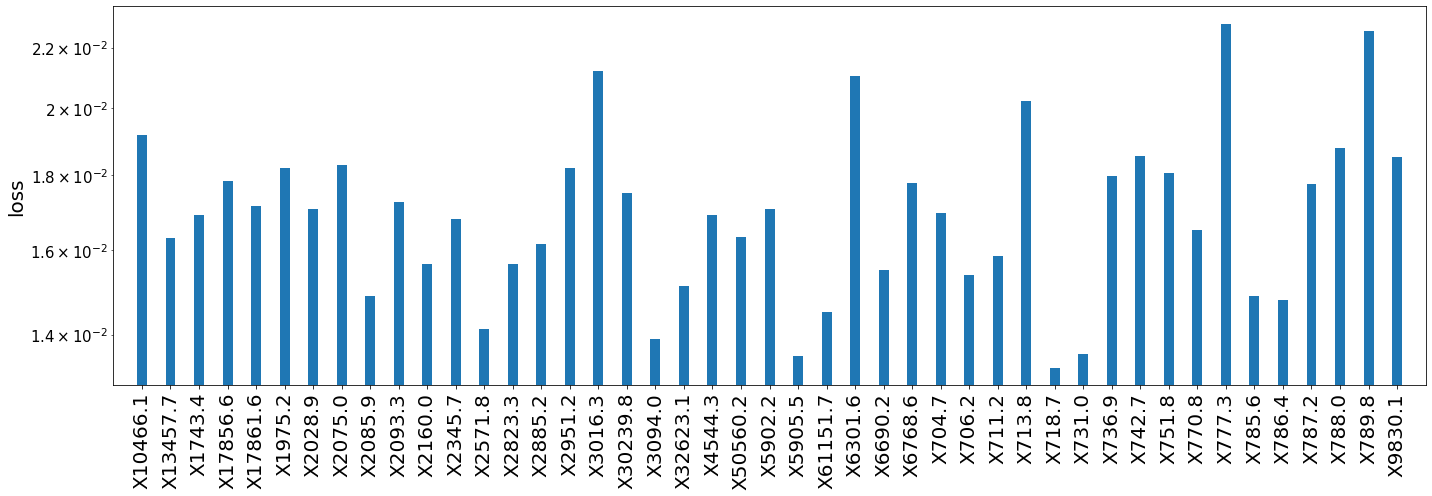

In [22]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('loss', fontsize=20)
ax.set_xticks(np.arange(imp.ncol))
ax.set_xticklabels(imp.cols,rotation=90)
ax.set_xlim(-1,imp.ncol)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
# ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'labs.jpg',dpi=100)